In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('park_pop_comp_visitation.csv')
df1.head()

,park_name,area_name,popularity,features_composite_score,visitations_2019,visitations_2018,visitations_2017
0,Angels Landing Trail,Zion National Park,84.622902,3.477306,4488268,4320033,4504812
1,Vernal and Nevada Falls via the Mist Trail,Yosemite National Park,68.148804,3.116873,4422861,4009436,4366890
2,Alum Cave Trail to Mount LeConte,Great Smoky Mountains National Park,61.375500,5.007037,12547743,11421200,11388893
3,Navajo Loop and Queen's Garden Trail,Bryce Canyon National Park,52.020100,1.723249,2594904,2679478,2571684
4,Tolmie Peak Trail,Mount Rainier National Park,49.552399,0.704542,1501621,1518491,2437800


In [3]:
new_row = []
for i, row in df1.iterrows():
    name = row['park_name']
    area_name = row['area_name']
    popularity = row['popularity']
    features_composite_score = row['features_composite_score']
    avg_visitations = (row['visitations_2019'] + row['visitations_2018'] + row['visitations_2017']) / 3
    new_row.append([name, area_name, popularity, features_composite_score, avg_visitations])

In [4]:
#Convert into new dataframe
cumulative_parks_new_df = pd.DataFrame(new_row, columns=['park_name','area_name','popularity','features_composite_score','avg_visitations'])
cumulative_parks_new_df.head()


,park_name,area_name,popularity,features_composite_score,avg_visitations
0,Angels Landing Trail,Zion National Park,84.622902,3.477306,4.437704e+06
1,Vernal and Nevada Falls via the Mist Trail,Yosemite National Park,68.148804,3.116873,4.266396e+06
2,Alum Cave Trail to Mount LeConte,Great Smoky Mountains National Park,61.375500,5.007037,1.178595e+07
3,Navajo Loop and Queen's Garden Trail,Bryce Canyon National Park,52.020100,1.723249,2.615355e+06
4,Tolmie Peak Trail,Mount Rainier National Park,49.552399,0.704542,1.819304e+06


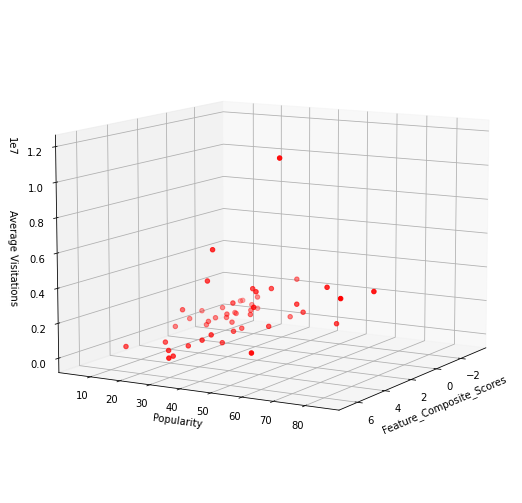

In [5]:
# #Plot to see the data
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# z =cumulative_parks_new_df['popularity']
# x =cumulative_parks_new_df['avg_visitations']
# y =cumulative_parks_new_df['features_composite_score']

# ax.scatter(x, y, z, c='r', marker='o')

# ax.set_xlabel('Average Visitations')
# ax.set_ylabel('Feature_Composite_Scores')
# ax.set_zlabel('Popularity')

# plt.show()

#Plot to see the data
fig = plt.figure(figsize = (12, 9))
ax = fig.add_subplot(111, projection='3d')

x =cumulative_parks_new_df['features_composite_score']
y =cumulative_parks_new_df['popularity']
z =cumulative_parks_new_df['avg_visitations']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Feature_Composite_Scores')
ax.set_ylabel('Popularity')
ax.set_zlabel('Average Visitations')
ax.view_init(10, 30)
plt.show()

In [6]:
#Sort the national parks data based on avg_visitations and popularity computed above.
# cumulative_parks_new_df.sort_values(by = ['avg_visitations', 'popularity'], ascending = [False, False],na_position = 'first',ignore_index=True,inplace=True)


In [7]:
#Load state parks data
state_parks_df = pd.read_csv('Sparks_final_new.csv')
state_parks_df.fillna('', inplace=True)

In [8]:
def isNaN(num):
    return num != num

In [9]:
def validateName(name):
    if not name and isNaN(name):
        return ""
    else:
        return name.strip()

In [10]:
def createKey(name, area_name):
    if not area_name:
        return name.strip()
    else:
        return name.strip() + "," + area_name.strip()
    

In [11]:
recommended_state_parks = {}
tempDf = None
for i, row in cumulative_parks_new_df.iterrows():
    national_park_name = row['park_name']
    national_park_area = row['area_name']
    features_composite_score = row['features_composite_score']

    state_park_records_with_diff = []
    for j, state_park_record in state_parks_df.iterrows():
        state_park_name = validateName(state_park_record['name'])
        state_park_area_name = validateName(state_park_record['area_name'])
        state_park_state_name = validateName(state_park_record['state_name'])
        state_park_composite = state_park_record['Composite']
        diff = abs(features_composite_score - state_park_composite)
        
        state_park_consolidated_name = ",".join([state_park_name, state_park_area_name, state_park_state_name])
        
        recommended_park_temp = [state_park_consolidated_name, state_park_composite, diff]
        
        state_park_records_with_diff.append(recommended_park_temp)
        
    tempDf = pd.DataFrame(state_park_records_with_diff, columns=['name','state_park_composite','diff'])
    tempDf.sort_values(by = ['diff'], ascending = [True],na_position = 'first',ignore_index=True,inplace=True)
    recommended_sparks = tempDf.iloc[[0, 1, 2]].values.tolist()
    nparkKey = createKey(national_park_name, national_park_area)
    recommended_state_parks[nparkKey] = recommended_sparks

In [12]:
jsonData = json.dumps(recommended_state_parks)

In [13]:
print(jsonData)

{"Angels Landing Trail,Zion National Park": [["Mount Whitney Portal to Lone Pine Lake,Inyo National Forest,California", 3.477563443, 0.0002570730000002186], ["Champney Falls - Bolles Chocura Loop,White Mountain National Forest,New Hampshire", 3.47803677, 0.0007304000000001309], ["Black Mountain Trail,Pike National Forest,Colorado", 3.478036807, 0.0007304370000000837]], "Vernal and Nevada Falls via the Mist Trail,Yosemite National Park": [["Robertson Mountain via Weakley Hollow and Old Rag Fire Roads,Shenandoah National Park,Virginia", 3.116807372, 6.588800000040251e-05], ["Woody Gap to Jarrard Gap,Blood Mountain Wilderness,Georgia", 3.117049291, 0.00017603099999963234], ["Tramway via Tree Spring Trail #147 and South Crest Trail #130,Cibola National Forest,New Mexico", 3.117486355, 0.0006130949999998414]], "Alum Cave Trail to Mount LeConte,Great Smoky Mountains National Park": [["Palisade Glacier Trail,John Muir Wilderness,California", 5.006176058, 0.0008611020000000025], ["Bear Creek T